Необходимо решить задачу на предсказание

# Модуль 1

Парсинг данных

In [1]:
# база
import numpy as np
import pandas as pd

# дополнтельные библиотеки
import zipfile
import os

# графические библиотеки что бы рисовать
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zip_filename = 'counterstrike.zip' # название зип-файла
extraction_folder = 'namename/' # путь 

# Разархивирование ZIP-файла
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

# Список файлов в извлеченной папке
file_list = os.listdir(extraction_folder)

In [3]:
print(file_list)

['maps_statistics.csv', 'top_100_players.csv', 'weapons_statistics.csv']


In [4]:
dataframes = {}

# Прочитаем каждый файл CSV и сохраним его в словаре под соответствующим именем
for csv_file in file_list:
    csv_file_path = os.path.join(extraction_folder, csv_file)
    df = pd.read_csv(csv_file_path)
    
    # Используем имя файла (без расширения) в качестве ключа в словаре
    df_name = os.path.splitext(csv_file)[0]
    
    # Сохраним DataFrame в словаре, используя уникальное имя
    dataframes[df_name] = df

df_maps = dataframes.get('maps_statistics')
df_players = dataframes.get('top_100_players')
df_weapons = dataframes.get('weapons_statistics')

In [5]:
df_maps.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"


In [6]:
df_players.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,"31,203",Asia,278,9,98
1,2,TTpo100Razeb Daniel,"29,626",Europe,250,12,174
2,3,REZPEZTâ¢,"29,588",Europe,133,2,58
3,4,rAdek1ngâ,"29,548",South America,75,1,8
4,5,ð,"29,480",Asia,106,0,10


In [7]:
df_weapons.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"


In [8]:
df_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Map        10 non-null     object
 1   Play Rate  10 non-null     object
 2   T-Win %    10 non-null     object
 3   CT-Win %   10 non-null     object
 4   Matches    10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes


In [9]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       100 non-null    int64 
 1   Name       100 non-null    object
 2   CS Rating  100 non-null    object
 3   Region     100 non-null    object
 4   Wins       100 non-null    int64 
 5   Ties       100 non-null    int64 
 6   Losses     100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [10]:
df_weapons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weapon       20 non-null     object 
 1   KPR          20 non-null     float64
 2   HS %         20 non-null     object 
 3   Chest %      20 non-null     object 
 4   Leg %        20 non-null     object 
 5   Total Kills  20 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


Уникальные значения и кодирование категориальных признаков

#### Карты

In [11]:
df_maps.head(10)

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"
5,Overpass,3.9%,48.2%,51.8%,"24,473"
6,Office,1.5%,54.2%,45.8%,"9,162"
7,Anubis,1.3%,51.4%,48.6%,"8,055"
8,Ancient,0.9%,48.7%,51.3%,"5,809"
9,Italy,0.3%,57.8%,42.2%,"1,883"


In [12]:
print(f"Полностью: {df_maps.shape}")
print(f"Кол-во строк: {df_maps.shape[0]}")
print(f"Кол-во столбцов: {df_maps.shape[1]}")

Полностью: (10, 5)
Кол-во строк: 10
Кол-во столбцов: 5


In [13]:
df_maps['Map'].unique()

array(['Dust II', 'Mirage', 'Inferno', 'Nuke', 'Vertigo', 'Overpass',
       'Office', 'Anubis', 'Ancient', 'Italy'], dtype=object)

In [14]:
df_maps = pd.get_dummies(df_maps, columns=['Map'], prefix='Code')

In [15]:
df_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Play Rate      10 non-null     object
 1   T-Win %        10 non-null     object
 2   CT-Win %       10 non-null     object
 3   Matches        10 non-null     object
 4   Code_Ancient   10 non-null     bool  
 5   Code_Anubis    10 non-null     bool  
 6   Code_Dust II   10 non-null     bool  
 7   Code_Inferno   10 non-null     bool  
 8   Code_Italy     10 non-null     bool  
 9   Code_Mirage    10 non-null     bool  
 10  Code_Nuke      10 non-null     bool  
 11  Code_Office    10 non-null     bool  
 12  Code_Overpass  10 non-null     bool  
 13  Code_Vertigo   10 non-null     bool  
dtypes: bool(10), object(4)
memory usage: 552.0+ bytes


In [16]:
df_maps.head(10)

,Play Rate,T-Win %,CT-Win %,Matches,Code_Ancient,Code_Anubis,Code_Dust II,Code_Inferno,Code_Italy,Code_Mirage,Code_Nuke,Code_Office,Code_Overpass,Code_Vertigo
0,26.7%,49.2%,50.8%,"168,288",False,False,True,False,False,False,False,False,False,False
1,23.9%,49.1%,50.9%,"150,883",False,False,False,False,False,True,False,False,False,False
2,13.1%,50.3%,49.7%,"82,737",False,False,False,True,False,False,False,False,False,False
3,4.3%,47.0%,53.0%,"27,211",False,False,False,False,False,False,True,False,False,False
4,4.0%,47.8%,52.2%,"25,390",False,False,False,False,False,False,False,False,False,True
5,3.9%,48.2%,51.8%,"24,473",False,False,False,False,False,False,False,False,True,False
6,1.5%,54.2%,45.8%,"9,162",False,False,False,False,False,False,False,True,False,False
7,1.3%,51.4%,48.6%,"8,055",False,True,False,False,False,False,False,False,False,False
8,0.9%,48.7%,51.3%,"5,809",True,False,False,False,False,False,False,False,False,False
9,0.3%,57.8%,42.2%,"1,883",False,False,False,False,True,False,False,False,False,False


In [17]:
df_maps['Play Rate'] = df_maps['Play Rate'].str.rstrip('%').astype('float') / 100
df_maps['T-Win %'] = df_maps['T-Win %'].str.rstrip('%').astype('float') / 100
df_maps['CT-Win %'] = df_maps['CT-Win %'].str.rstrip('%').astype('float') / 100

In [18]:
df_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Play Rate      10 non-null     float64
 1   T-Win %        10 non-null     float64
 2   CT-Win %       10 non-null     float64
 3   Matches        10 non-null     object 
 4   Code_Ancient   10 non-null     bool   
 5   Code_Anubis    10 non-null     bool   
 6   Code_Dust II   10 non-null     bool   
 7   Code_Inferno   10 non-null     bool   
 8   Code_Italy     10 non-null     bool   
 9   Code_Mirage    10 non-null     bool   
 10  Code_Nuke      10 non-null     bool   
 11  Code_Office    10 non-null     bool   
 12  Code_Overpass  10 non-null     bool   
 13  Code_Vertigo   10 non-null     bool   
dtypes: bool(10), float64(3), object(1)
memory usage: 552.0+ bytes


In [19]:
df_maps['Matches'] = df_maps['Matches'].str.replace(',', '').astype('int')

In [20]:
df_maps.head(10)

,Play Rate,T-Win %,CT-Win %,Matches,Code_Ancient,Code_Anubis,Code_Dust II,Code_Inferno,Code_Italy,Code_Mirage,Code_Nuke,Code_Office,Code_Overpass,Code_Vertigo
0,0.267,0.492,0.508,168288,False,False,True,False,False,False,False,False,False,False
1,0.239,0.491,0.509,150883,False,False,False,False,False,True,False,False,False,False
2,0.131,0.503,0.497,82737,False,False,False,True,False,False,False,False,False,False
3,0.043,0.470,0.530,27211,False,False,False,False,False,False,True,False,False,False
4,0.040,0.478,0.522,25390,False,False,False,False,False,False,False,False,False,True
5,0.039,0.482,0.518,24473,False,False,False,False,False,False,False,False,True,False
6,0.015,0.542,0.458,9162,False,False,False,False,False,False,False,True,False,False
7,0.013,0.514,0.486,8055,False,True,False,False,False,False,False,False,False,False
8,0.009,0.487,0.513,5809,True,False,False,False,False,False,False,False,False,False
9,0.003,0.578,0.422,1883,False,False,False,False,True,False,False,False,False,False


In [21]:
df_maps.isnull().sum()

Play Rate        0
T-Win %          0
CT-Win %         0
Matches          0
Code_Ancient     0
Code_Anubis      0
Code_Dust II     0
Code_Inferno     0
Code_Italy       0
Code_Mirage      0
Code_Nuke        0
Code_Office      0
Code_Overpass    0
Code_Vertigo     0
dtype: int64

C:\Users\volga\AppData\Local\Temp\ipykernel_9488\839401170.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, ci=None)


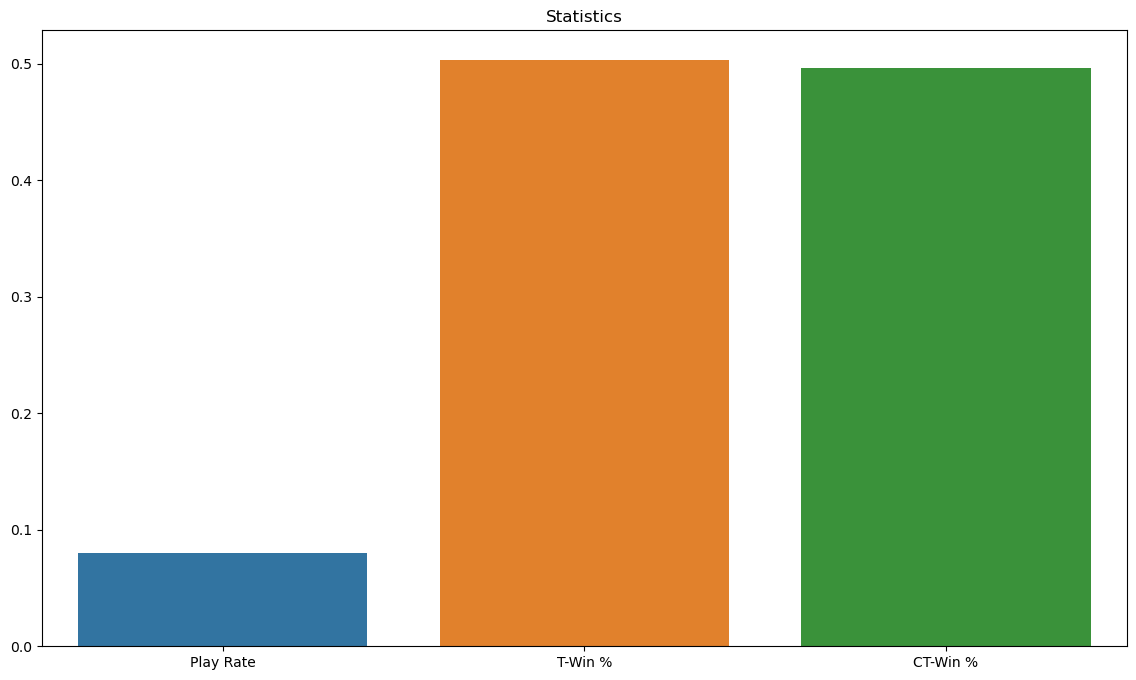

In [22]:
data_to_plot = df_maps[['Play Rate', 'T-Win %', 'CT-Win %']]

# Построение графика
plt.figure(figsize=(14, 8))
sns.barplot(data=data_to_plot, ci=None)
plt.title('Statistics')
plt.show()

C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3757461299.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_maps.index, y=stat, hue=df_maps.columns[4:], ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3757461299.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_maps.index, y=stat, hue=df_maps.columns[4:], ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3757461299.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_maps.index, y=stat, hue=df_maps.columns[4:], ax=axes[i], ci=None)


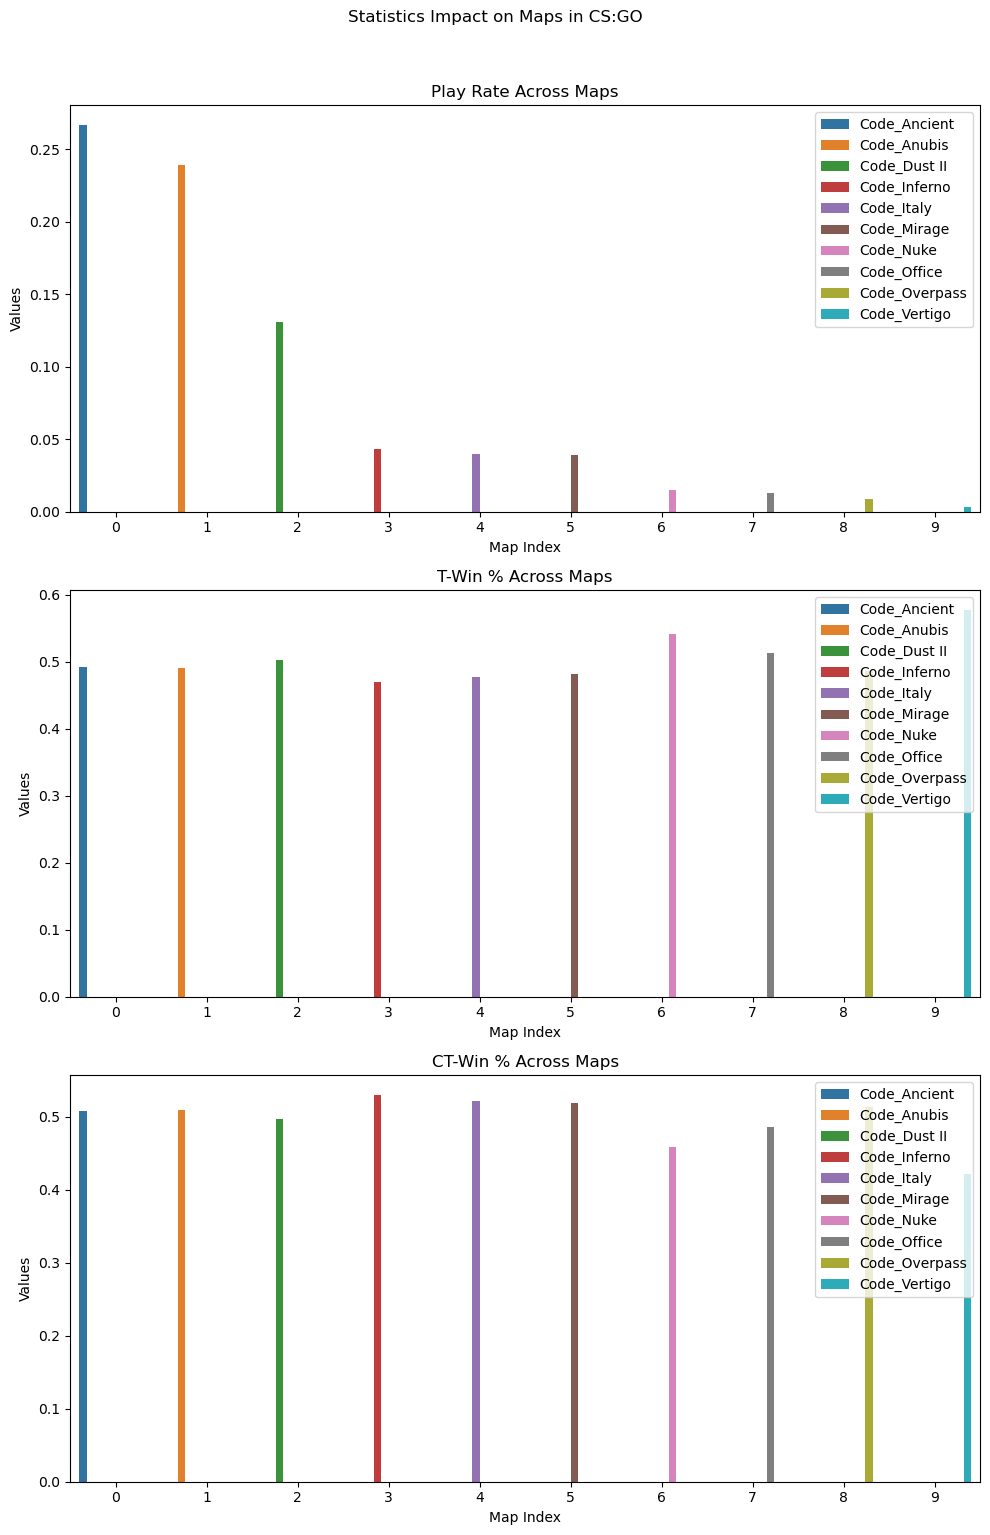

In [23]:
data_to_plot = df_maps[['Play Rate', 'T-Win %', 'CT-Win %']]

# Построение графиков
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Размещение графиков
for i, stat in enumerate(['Play Rate', 'T-Win %', 'CT-Win %']):
    sns.barplot(data=data_to_plot, x=df_maps.index, y=stat, hue=df_maps.columns[4:], ax=axes[i], ci=None)
    axes[i].set_title(f'{stat} Across Maps')
    axes[i].set_xlabel('Map Index')
    axes[i].set_ylabel('Values')

# Установка общего заголовка
fig.suptitle('Statistics Impact on Maps in CS:GO', y=1.02)

plt.tight_layout()
plt.show()

#### Оружия

In [24]:
df_weapons.head(20)

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"
5,Desert Eagle,0.9,28.5%,58.7%,9.0%,"84,197"
6,Glock-18,0.9,17.8%,65.5%,11.8%,"83,899"
7,Galil AR,1.1,18.1%,57.6%,18.4%,"63,215"
8,FAMAS,1.0,18.9%,58.7%,16.9%,"50,834"
9,P90,1.0,10.0%,58.3%,24.1%,"27,907"


In [25]:
print(f"Полностью: {df_weapons.shape}")
print(f"Кол-во строк: {df_weapons.shape[0]}")
print(f"Кол-во столбцов: {df_weapons.shape[1]}")

Полностью: (20, 6)
Кол-во строк: 20
Кол-во столбцов: 6


In [26]:
df_weapons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Weapon       20 non-null     object 
 1   KPR          20 non-null     float64
 2   HS %         20 non-null     object 
 3   Chest %      20 non-null     object 
 4   Leg %        20 non-null     object 
 5   Total Kills  20 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.1+ KB


In [27]:
df_weapons['Weapon'].unique()

array(['AK-47', 'M4A1-S', 'AWP', 'M4A1', 'USP-S', 'Desert Eagle',
       'Glock-18', 'Galil AR', 'FAMAS', 'P90', 'SG 553', 'MP9', 'AUG',
       'MAC-10', 'MP7', 'P250', 'Tec-9', 'XM1014', 'G3SG1', 'P2000'],
      dtype=object)

In [28]:
df_weapons = pd.get_dummies(df_weapons, columns=['Weapon'], prefix='Code')

In [29]:
df_weapons.head(20)

,KPR,HS %,Chest %,Leg %,Total Kills,Code_AK-47,Code_AUG,Code_AWP,Code_Desert Eagle,Code_FAMAS,...,Code_MAC-10,Code_MP7,Code_MP9,Code_P2000,Code_P250,Code_P90,Code_SG 553,Code_Tec-9,Code_USP-S,Code_XM1014
0,1.2,17.8%,59.4%,16.7%,"370,567",True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.1,14.6%,60.3%,18.3%,"181,934",False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.6,14.5%,68.7%,10.1%,"164,754",False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.2,18.0%,60.6%,15.5%,"104,012",False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.9,21.2%,63.5%,10.5%,"94,958",False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,0.9,28.5%,58.7%,9.0%,"84,197",False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,0.9,17.8%,65.5%,11.8%,"83,899",False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1.1,18.1%,57.6%,18.4%,"63,215",False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1.0,18.9%,58.7%,16.9%,"50,834",False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,1.0,10.0%,58.3%,24.1%,"27,907",False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [30]:
df_weapons['HS %'] = df_weapons['HS %'].str.rstrip('%').astype('float') / 100
df_weapons['Chest %'] = df_weapons['Chest %'].str.rstrip('%').astype('float') / 100
df_weapons['Leg %'] = df_weapons['Leg %'].str.rstrip('%').astype('float') / 100

df_weapons['Total Kills'] = df_weapons['Total Kills'].str.replace(',', '').astype('int')

In [31]:
df_weapons.head()

,KPR,HS %,Chest %,Leg %,Total Kills,Code_AK-47,Code_AUG,Code_AWP,Code_Desert Eagle,Code_FAMAS,...,Code_MAC-10,Code_MP7,Code_MP9,Code_P2000,Code_P250,Code_P90,Code_SG 553,Code_Tec-9,Code_USP-S,Code_XM1014
0,1.2,0.178,0.594,0.167,370567,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.1,0.146,0.603,0.183,181934,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.6,0.145,0.687,0.101,164754,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.2,0.180,0.606,0.155,104012,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.9,0.212,0.635,0.105,94958,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [32]:
df_weapons.isnull().sum()

KPR                  0
HS %                 0
Chest %              0
Leg %                0
Total Kills          0
Code_AK-47           0
Code_AUG             0
Code_AWP             0
Code_Desert Eagle    0
Code_FAMAS           0
Code_G3SG1           0
Code_Galil AR        0
Code_Glock-18        0
Code_M4A1            0
Code_M4A1-S          0
Code_MAC-10          0
Code_MP7             0
Code_MP9             0
Code_P2000           0
Code_P250            0
Code_P90             0
Code_SG 553          0
Code_Tec-9           0
Code_USP-S           0
Code_XM1014          0
dtype: int64

In [33]:
df_weapons.head(21).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
KPR,1.2,1.1,1.6,1.2,0.9,0.9,0.9,1.1,1.0,1.0,1.2,0.8,1.3,0.8,1.0,0.7,0.8,1.0,1.9,0.8
HS %,0.178,0.146,0.145,0.18,0.212,0.285,0.178,0.181,0.189,0.1,0.138,0.125,0.127,0.114,0.09,0.182,0.149,0.109,0.151,0.139
Chest %,0.594,0.603,0.687,0.606,0.635,0.587,0.655,0.576,0.587,0.583,0.597,0.624,0.614,0.603,0.591,0.633,0.632,0.593,0.613,0.67
Leg %,0.167,0.183,0.101,0.155,0.105,0.09,0.118,0.184,0.169,0.241,0.188,0.181,0.185,0.212,0.24,0.13,0.156,0.22,0.155,0.133
Total Kills,370567,181934,164754,104012,94958,84197,83899,63215,50834,27907,27572,25846,25335,20285,15535,12575,11796,10428,9289,8306
Code_AK-47,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Code_AUG,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Code_AWP,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Code_Desert Eagle,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Code_FAMAS,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df_weapons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KPR                20 non-null     float64
 1   HS %               20 non-null     float64
 2   Chest %            20 non-null     float64
 3   Leg %              20 non-null     float64
 4   Total Kills        20 non-null     int32  
 5   Code_AK-47         20 non-null     bool   
 6   Code_AUG           20 non-null     bool   
 7   Code_AWP           20 non-null     bool   
 8   Code_Desert Eagle  20 non-null     bool   
 9   Code_FAMAS         20 non-null     bool   
 10  Code_G3SG1         20 non-null     bool   
 11  Code_Galil AR      20 non-null     bool   
 12  Code_Glock-18      20 non-null     bool   
 13  Code_M4A1          20 non-null     bool   
 14  Code_M4A1-S        20 non-null     bool   
 15  Code_MAC-10        20 non-null     bool   
 16  Code_MP7           20 non-nu

C:\Users\volga\AppData\Local\Temp\ipykernel_9488\792042309.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_weapons.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\792042309.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_weapons.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\792042309.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_weapons.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\792042309.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_weapons.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipyker

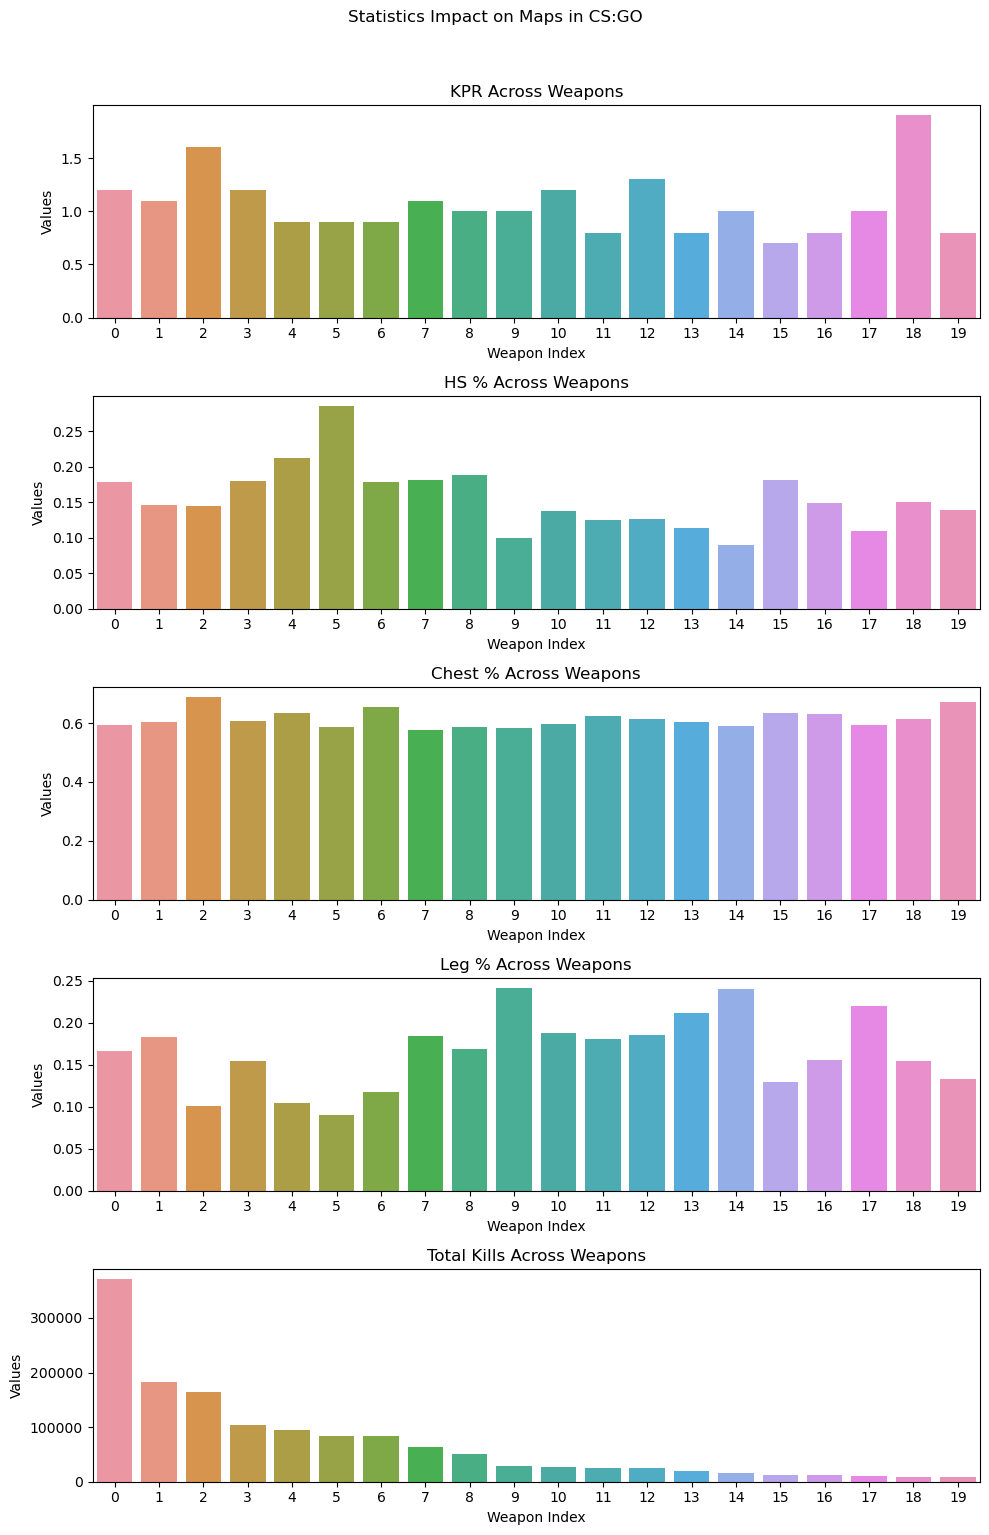

In [35]:
data_to_plot = df_weapons[['KPR','HS %','Chest %','Leg %','Total Kills']]

# Построение графиков
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Размещение графиков
for i, stat in enumerate(['KPR','HS %','Chest %','Leg %','Total Kills']):
    sns.barplot(data=data_to_plot, x=df_weapons.index, y=stat, ax=axes[i], ci=None)
    axes[i].set_title(f'{stat} Across Weapons')
    axes[i].set_xlabel('Weapon Index')
    axes[i].set_ylabel('Values')

# Установка общего заголовка
fig.suptitle('Statistics Impact on Maps in CS:GO', y=1.02)

plt.tight_layout()
plt.show()

#### Игроки

In [36]:
df_players.head(100)

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,"31,203",Asia,278,9,98
1,2,TTpo100Razeb Daniel,"29,626",Europe,250,12,174
2,3,REZPEZTâ¢,"29,588",Europe,133,2,58
3,4,rAdek1ngâ,"29,548",South America,75,1,8
4,5,ð,"29,480",Asia,106,0,10
...,...,...,...,...,...,...,...
95,96,k1soouu-_-,"27,058",South America,313,17,131
96,97,WENDE TRAGE-MI ASA,"27,057",Europe,133,2,84
97,98,Mr. Clean,"27,049",North America,26,0,6
98,99,âððð¡ðððð,"27,043",Europe,31,0,9


In [37]:
print(f"Полностью: {df_players.shape}")
print(f"Кол-во строк: {df_players.shape[0]}")
print(f"Кол-во столбцов: {df_players.shape[1]}")

Полностью: (100, 7)
Кол-во строк: 100
Кол-во столбцов: 7


In [38]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       100 non-null    int64 
 1   Name       100 non-null    object
 2   CS Rating  100 non-null    object
 3   Region     100 non-null    object
 4   Wins       100 non-null    int64 
 5   Ties       100 non-null    int64 
 6   Losses     100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [39]:
df_players['Region'].unique()

array(['Asia', 'Europe', 'South America', 'North America', 'Australia',
       'Africa'], dtype=object)

In [40]:
df_players['Name'].unique()

array(['sH0oRuk YouTube', 'TTpo100Razeb Daniel', 'REZPEZTâ\x84¢',
       'rAdek1ngâ\x80\x99', 'ð\x9f\x98\x9c', 'Riky', 'ravenous',
       'Garfield', 'shining', 'core', 'Vaquero 1Tap', 'SNowRC', 'Kylar',
       'yeonha', 'Konrad',
       'ð\x9d\x90\x8cð\x9d\x90\x92ð\x9d\x90¢ ð\x9d\x90\x8eð\x9d\x90«ð\x9d\x90¢ð\x9d\x90\x86ð\x9d\x90§ð\x9d\x90\x9að\x9d\x90\x8b',
       'kill', 'P A R L I A M E N T', "THE REKTOR Ð\x9cÐ\x93Ð£'",
       'tucker', 'Mr.Asian', 'AJ', "yÃ©kawsitO'", 'Hausmeister',
       'Platinum', 'Sync', 'Tumpok', 'Zanetti', 'Superzapped', 'G3TS.',
       'Ð\x95bu Princess - Rustam H', 'neetocracy', 'florq',
       'ó\xa0\x81³â\x81§â\x81§420user', 'yudE-', 'UWUWEWUE', 'savage',
       'ð\x9d\x99¨ð\x9d\x99£ð\x9d\x99¤ð\x9d\x99¬',
       'Ñ\x81ÐµÐ³Ð¾Ð´Ð½Ñ\x8f Ð½Ð° Ñ\x82Ñ\x80ÐµÐ·Ð²Ð¾', 'graphite',
       'Milky', 'stoic', 'zebiyo', 'Ð¼Ð´Ð¼Ñ\x8dÐ¹', 'NotJuanjo', 'naMqe',
       'TeSSSL', 'Melloh', 'muita beleza pouca bala', 'She is mine',
       'Ray Masterio', 'Red1many', 'detrÃ¡s

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_players['Name']=le.fit_transform(df_players['Name'])
df_players['Region']=le.fit_transform(df_players['Region'])

df_players['CS Rating'] = df_players['CS Rating'].str.replace(',', '').astype('int')

In [42]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Rank       100 non-null    int64
 1   Name       100 non-null    int32
 2   CS Rating  100 non-null    int32
 3   Region     100 non-null    int32
 4   Wins       100 non-null    int64
 5   Ties       100 non-null    int64
 6   Losses     100 non-null    int64
dtypes: int32(3), int64(4)
memory usage: 4.4 KB


In [43]:
df_players.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,72,31203,1,278,9,98
1,2,41,29626,3,250,12,174
2,3,30,29588,3,133,2,58
3,4,69,29548,5,75,1,8
4,5,97,29480,1,106,0,10


In [44]:
df_players.isnull().sum()

Rank         0
Name         0
CS Rating    0
Region       0
Wins         0
Ties         0
Losses       0
dtype: int64

C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3245813627.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_players.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3245813627.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_players.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3245813627.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_players.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ipykernel_9488\3245813627.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_to_plot, x=df_players.index, y=stat, ax=axes[i], ci=None)
C:\Users\volga\AppData\Local\Temp\ip

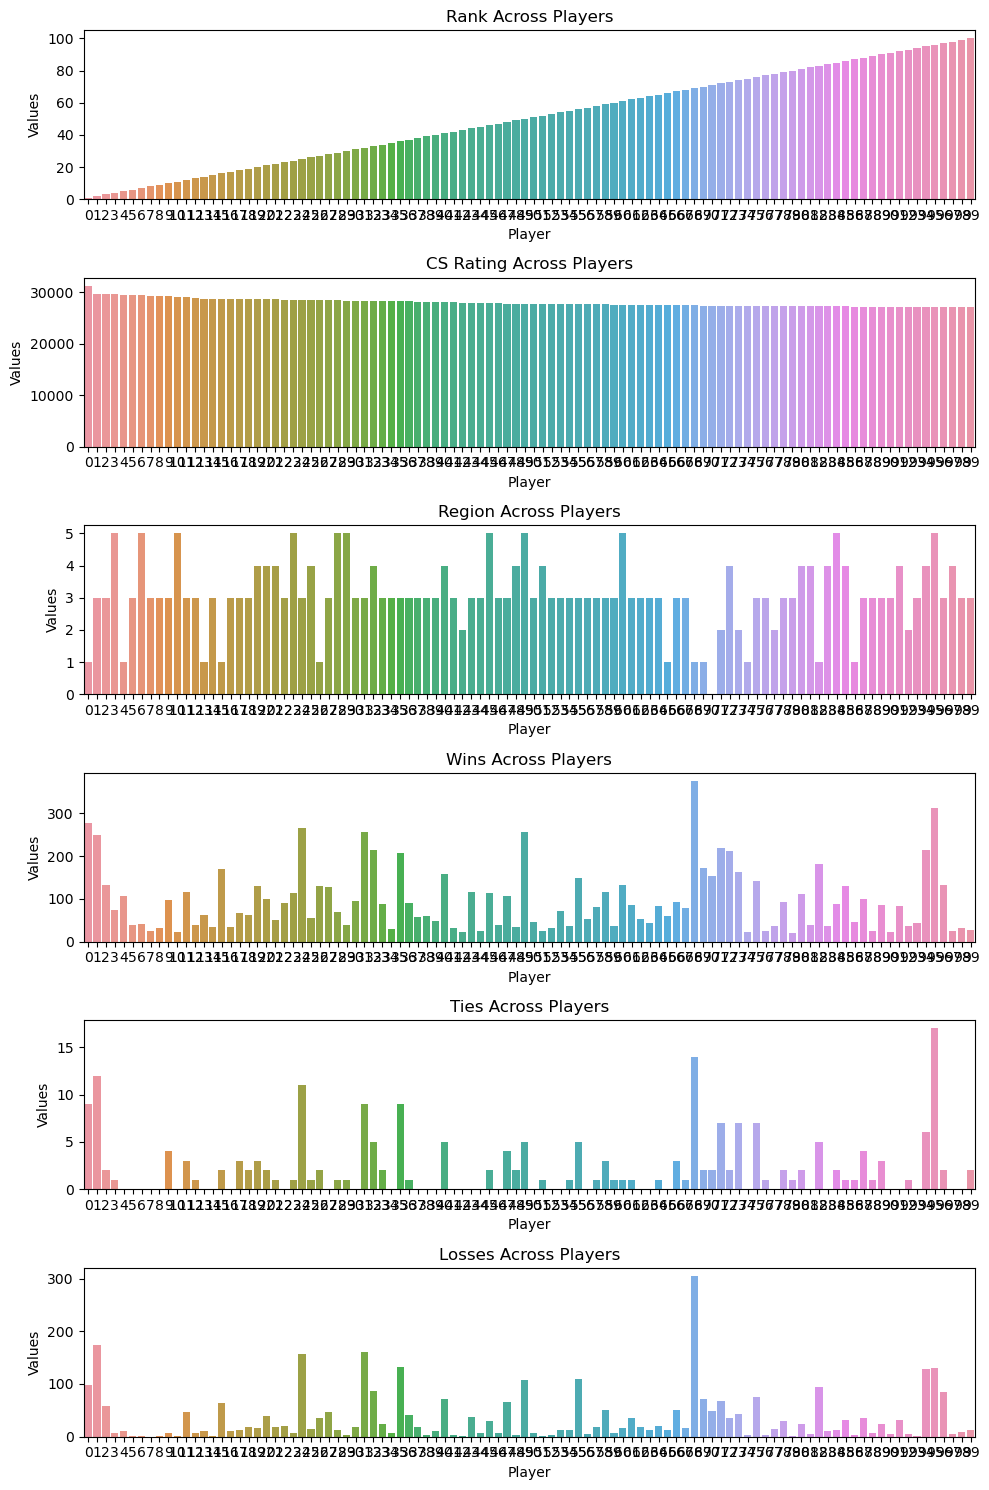

In [45]:
data_to_plot = df_players[['Rank','CS Rating','Region','Wins','Ties','Losses']]

# Построение графиков
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 15))

# Размещение графиков
for i, stat in enumerate(['Rank','CS Rating','Region','Wins','Ties','Losses']):
    sns.barplot(data=data_to_plot, x=df_players.index, y=stat, ax=axes[i], ci=None)
    axes[i].set_title(f'{stat} Across Players')
    axes[i].set_xlabel('Player')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

# Модуль 2

#### Карты

In [133]:
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test, y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [134]:
df_maps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Play Rate      10 non-null     float64
 1   T-Win %        10 non-null     float64
 2   CT-Win %       10 non-null     float64
 3   Matches        10 non-null     int32  
 4   Code_Ancient   10 non-null     bool   
 5   Code_Anubis    10 non-null     bool   
 6   Code_Dust II   10 non-null     bool   
 7   Code_Inferno   10 non-null     bool   
 8   Code_Italy     10 non-null     bool   
 9   Code_Mirage    10 non-null     bool   
 10  Code_Nuke      10 non-null     bool   
 11  Code_Office    10 non-null     bool   
 12  Code_Overpass  10 non-null     bool   
 13  Code_Vertigo   10 non-null     bool   
dtypes: bool(10), float64(3), int32(1)
memory usage: 512.0 bytes


In [135]:
np.isinf(df_maps).sum()

Play Rate        0
T-Win %          0
CT-Win %         0
Matches          0
Code_Ancient     0
Code_Anubis      0
Code_Dust II     0
Code_Inferno     0
Code_Italy       0
Code_Mirage      0
Code_Nuke        0
Code_Office      0
Code_Overpass    0
Code_Vertigo     0
dtype: int64

In [136]:
from sklearn.model_selection import train_test_split

X1 = df_maps.drop(['Matches'], axis=1)
y1 = df_maps['Matches']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [137]:
np.isinf(y1_test).sum()

0

In [138]:
np.isinf(y1_pred).sum()

0

In [139]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

In [140]:
print("y1_test:", y1_test)
print("y1_pred:", y1_pred)

y1_test: 8      5809
1    150883
Name: Matches, dtype: int32
y1_pred: [21510.07 86809.99]


In [141]:
print_metrics(y1_test,y1_pred)

MAE: 39887.03999999999
RMSE: 46646.94100155443
R2: 0.5864508257153592
MAPE: 156.37702527062513


In [142]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression1 = LinearRegression()

# Обучили модель на тренировочной выборке
model_regression1.fit(X1_train, y1_train)

# Сделали прогнозы на тестовой выборке
y1_pred = model_regression1.predict(X1_test)

print_metrics(y1_test, y1_pred)

MAE: 68723.62321136292
RMSE: 76212.06432160069
R2: -0.10389628221103009
MAPE: 341.65360394960607


In [143]:
df_weapons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KPR                20 non-null     float64
 1   HS %               20 non-null     float64
 2   Chest %            20 non-null     float64
 3   Leg %              20 non-null     float64
 4   Total Kills        20 non-null     int32  
 5   Code_AK-47         20 non-null     bool   
 6   Code_AUG           20 non-null     bool   
 7   Code_AWP           20 non-null     bool   
 8   Code_Desert Eagle  20 non-null     bool   
 9   Code_FAMAS         20 non-null     bool   
 10  Code_G3SG1         20 non-null     bool   
 11  Code_Galil AR      20 non-null     bool   
 12  Code_Glock-18      20 non-null     bool   
 13  Code_M4A1          20 non-null     bool   
 14  Code_M4A1-S        20 non-null     bool   
 15  Code_MAC-10        20 non-null     bool   
 16  Code_MP7           20 non-nu

In [144]:
from sklearn.model_selection import train_test_split

X2 = df_weapons.drop(['Total Kills'], axis=1)
y2 = df_weapons['Total Kills']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.fit_transform(X2_test)

In [146]:
from sklearn.linear_model import LinearRegression

# Инициализация модели линейной регрессии
linear_model = LinearRegression()

# Обучение модели
linear_model.fit(X2_train, y2_train)

# Предсказание на тестовом наборе
y2_pred_linear = linear_model.predict(X2_test)

# Оценка качества модели
print_metrics(y2_test, y2_pred_linear)

MAE: 129036.52974818819
RMSE: 171530.59874259552
R2: -0.3391393207668032
MAPE: 188.84548812305505


In [147]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X2_train, y2_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y2_pred = lasso_cv.predict(X2_test)

print_metrics(y2_test,y2_pred)

Лучшее значение параметра: 13619.850028781488
MAE: 130778.22509547517
RMSE: 172761.05657561662
R2: -0.3584205974713168
MAPE: 201.46142924839637


In [148]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Rank       100 non-null    int64
 1   Name       100 non-null    int32
 2   CS Rating  100 non-null    int32
 3   Region     100 non-null    int32
 4   Wins       100 non-null    int64
 5   Ties       100 non-null    int64
 6   Losses     100 non-null    int64
dtypes: int32(3), int64(4)
memory usage: 4.4 KB


In [149]:
from sklearn.model_selection import train_test_split

X3 = df_players.drop(['CS Rating'], axis=1)
y3 = df_players['CS Rating']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.fit_transform(X3_test)

In [151]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()
model3.fit(X3_train, y3_train)
y3_pred = model3.predict(X3_test)

print_metrics(y3_test, y3_pred)

MAE: 225.6284999999998
RMSE: 426.56048759232254
R2: 0.8058381726193433
MAPE: 0.7692691945699333
